# Описание проекта
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам **нужно выявить определяющие успешность игры закономерности**. Это позволит **сделать ставку на потенциально популярный продукт** и **спланировать рекламные кампании**.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. **Нужно отработать принцип работы с данными**. Не важно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

Для начала необходимо уяснить контекст и проработать запрос.

**Задача:** выявление закономерностей, определяющих успешность игр.

**Контекст:** планирование рекламной компании на будущий период, с целью создания (продвижения) потенциально популярного продукта.

**Цель данного проекта:** отработка принципа работы с данными.

## Описание данных games.csv
* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы долларов)
* EU_sales — продажи в Европе (миллионы долларов)
* JP_sales — продажи в Японии (миллионы долларов)
* Other_sales — продажи в других странах (миллионы долларов)
* Critic_Score — оценка критиков (от 0 до 100)
* User_Score — оценка пользователей (от 0 до 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

## Открытие файла, изучение общей информации
Путь к файлу: /datasets/games.csv

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
from scipy import stats as st

warnings.filterwarnings('ignore')

# Считываем датасет
df = pd.read_csv('/datasets/games.csv')
# Выводим общую информацию для ознакомления
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [2]:
# Выводим первые 5 записей для ознакомления
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
# Выводим количество пропусков в столбцах
df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

Исходя из общей информации о датасете его размер составляет около 1.4 мегабайт, содержит 16715 записей. Датасет считан корректно. 
Имеются пропуски данных в столбцах: Name(2), Year_of_Release(269), Genre(2), Critic_Score(8578), User_Score(6701), Rating(6766).

## Подготовка данных
* Замените названия столбцов (приведите к нижнему регистру);
* Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
* Обработайте пропуски при необходимости:
    * Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
    * Опишите причины, которые могли привести к пропускам;
    * Обратите внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Поясните, как обработать это значение.
* Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [4]:
# Приводим названия столбцов к нижнему регистру, проверяем отсутствие лишних символов (пробелов)
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Проведем краткий анализ по отстутствующим данным в датасете

In [5]:
# Записи где отствуют имена игр
df[df.name.isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [6]:
# Записи где отсутствуют года выпуска
df[df.year_of_release.isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


От записей с отсутствующими именами и рейтингами можно избавится так как игры были выпущены в 1993 году на платформе GEN их отсутствие не сильно повлияет на изучение закономерностей.

От записей с отсутствующими годами выпуска некоторых игр тоже возможно избавится так как они составляют малую долю датасета.

Записи с отсутствующими рейтингами и оценками пользователей и критиков не выводились, по причине того что они составляют практически более половины датасета. Избавляться от них нежелательно так как записи содержат информацию о продажах, что необходимо для нашего исследования.

Причина отсутствия рейтинга большинства записей может являться некачественная подготовка датасета. Частично восполнить данные датасета возможно используя знания полученные из темы "Извлечение данных из веб-ресурсов" курса "Сбор и хранение данных" в частности получение результата запросов get(библиотека requests) и поиска html-тегов(BeautifulSoup), либо с используя регулярные выражения(библиотека re). Например, используя результаты поискового запроса "Название игры Название платформы" в yandex и выделяя необходимые нам блоки, где находится год выпуска игры (поиск по регулярному выражению '>\d* г.<') и рейтинг на metacritic (span class="rating__value">81</span). К сожалению в автоматизированном режиме сбор информации усложняется в виду блокировки yandex автоматических запросов и просьбы ввести captcha.

Значения рейтинга tbd (To Be Determined, то есть "Будет определено") будет заменено на NaN.

In [7]:
# Удалим записи где отсутствую года выпуска, имена и жанры
df = df.dropna(subset=['name', 'year_of_release', 'genre'])
df.reset_index()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null float64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         9839 non-null object
rating             9768 non-null object
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [8]:
# Преобразуем данные в нужные типы

# Столбец year_of_release - года выпуска имеет тип float64, преобразуем его в тип int
df['year_of_release'] = df.year_of_release.astype('int64', errors='ignore')

# Столбец user_score - рейтинг пользователей имеет тип object, преобразуем его в тип float64, 
# использование errors='coerce' позволит заменить tbd на NaN
df['user_score'] = pd.to_numeric(df.user_score, errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         7463 non-null float64
rating             9768 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Произведем поиск дубликатов и проверку уникальности в столбцах platform, genre

In [9]:
# проверка уникальности наименований жанров
df.genre.unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [10]:
# проверка уникальности наименований платформ
df.platform.unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [11]:
# проверка уникальности наименований имен игр и поиск дублей
df[df.duplicated() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


В датасете полный дублей не оказалось, если наименования игр повторялись то лишь с разницей платформ на которых игра выпускалась. Анализ наличия повторяющихся наименований жанров и платформ с разными регистрами, либо с лишними символами показал отсутствие таковых.

In [12]:
# Подсчет суммарных продаж и запись в отдельном столбце total_sales
df['total_sales'] = df.na_sales + df.eu_sales + df.jp_sales + df.other_sales
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


В данном разделе было выполнено переименование столбцов(переведение в нижний регистр), удалены записи с отсутствующими именами, жанрами, а также годами выпусков.

Записи с отсутствующими оценками пользователей, критиков, а также рейтингами игр были оставлены. Произведен поиск дубликатов и проверка уникальности наименований жанров и платформ.

Выполнен подсчет суммарных продаж каждой записи.

## Проведение исследовательского анализа данных
* Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
* Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. Найдите популярные в прошлом платформы, у которых сейчас продажи на нуле. За какой характерный период появляются новые и исчезают старые платформы?
* Определите, данные за какой период нужно взять, чтобы исключить значимое искажение распределения по платформам в 2016 году.
* Далее работайте только с данными, которые вы определили. Не учитывайте данные за предыдущие годы.
* Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
* Постройте график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. Велика ли разница в продажах? А в средних продажах на разных платформах? Опишите результат.
* Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы и соотнесите их с продажами игр на других платформах.
* Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         7463 non-null float64
rating             9768 non-null object
total_sales        16444 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


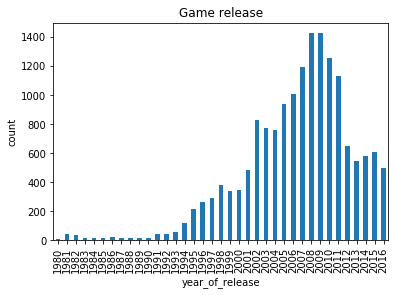

In [14]:
# Сгруппируем данные по годам и посчитаем количество игр
df.groupby('year_of_release')['name'].count().plot(kind='bar')
plt.title('Game release')
plt.ylabel('count')
plt.show()

Пик выпуска игр пришелся на 2008, 2009 года, затем темп выпуска игр снизился. Это может быть охарактеризовано количеством платформ, на которых выпускались игры. После 2010 года снижение выпуска игр может быть охарактеризовано уменьшением количества популярных платформ.

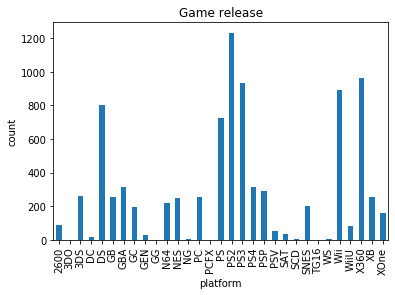

In [15]:
# Сгруппируем данные по платформам и посчитаем суммарные продажи по ним
platform_total_sales = df.groupby('platform')['total_sales'].sum()
platform_total_sales.plot(kind='bar')
plt.title('Game release')
plt.ylabel('count')
plt.show()

Условно выделяются платформы по количеству продаж за все время до 100 миллионов, до 300 миллионов и свыше 300

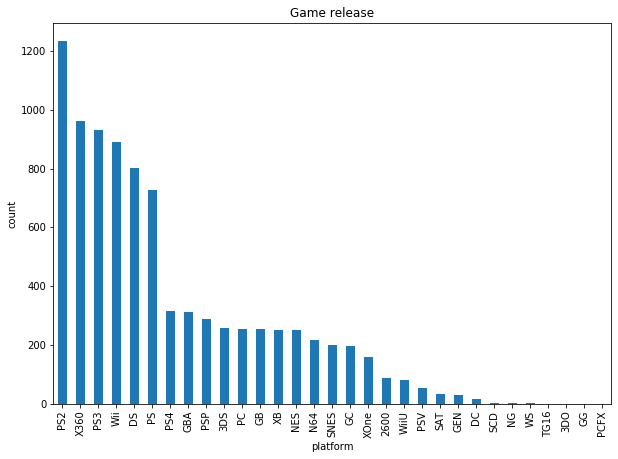

In [16]:
# Отсортируем по количеству суммарных продаж каждой платформы
top_platforms = platform_total_sales.sort_values(ascending=False)
plt.figure(figsize=(10,7))
top_platforms.plot(kind='bar')

plt.title('Game release')
plt.ylabel('count')
plt.show()

Условно по суммарным продажам свыше 300 миллионов можно выделить следующие платформы: PS2, X360, PS3, Wii, DS, PS

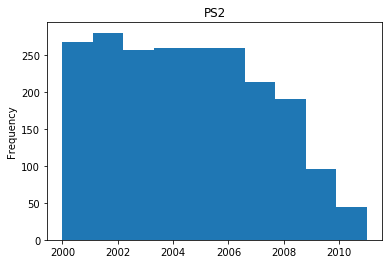

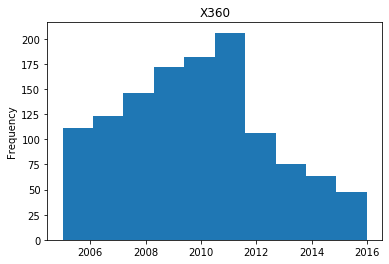

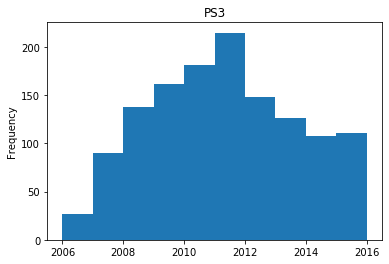

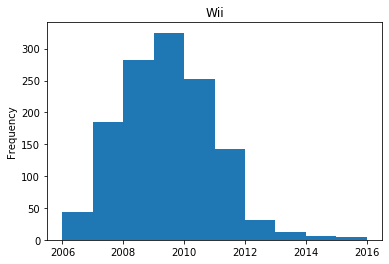

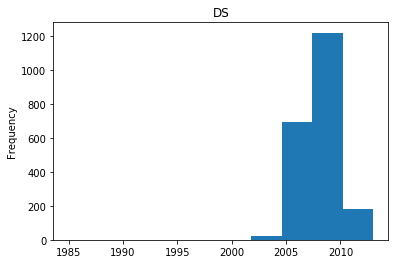

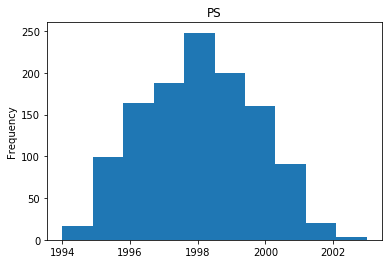

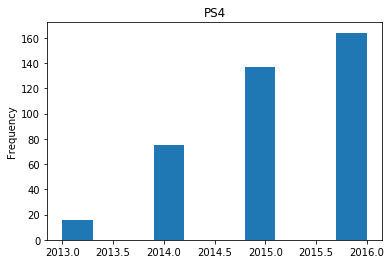

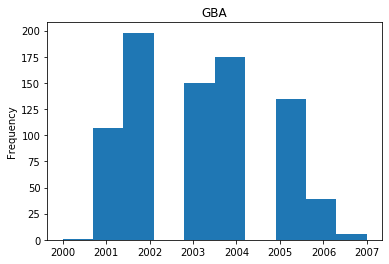

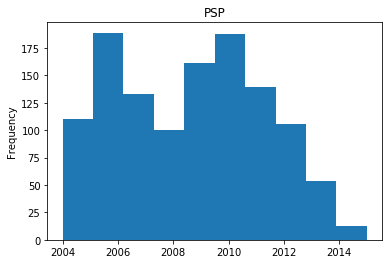

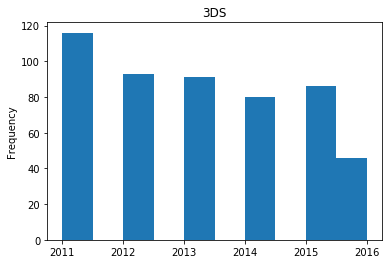

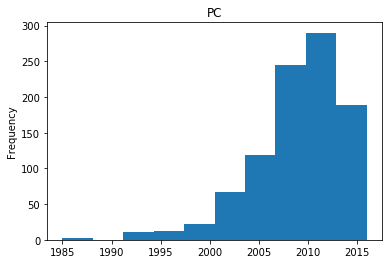

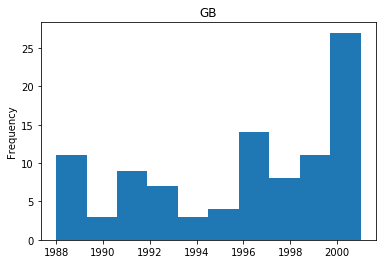

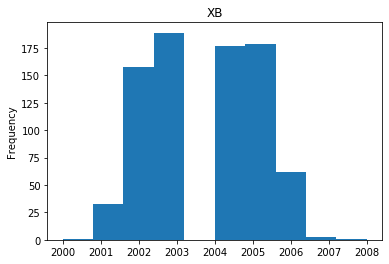

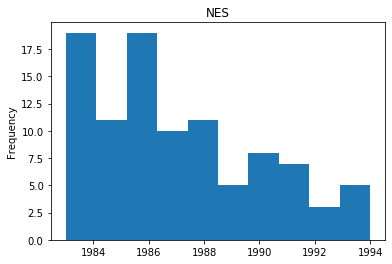

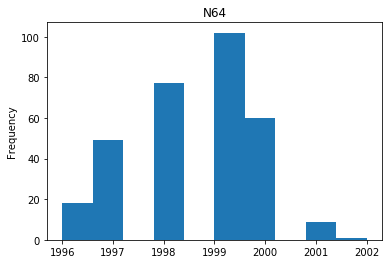

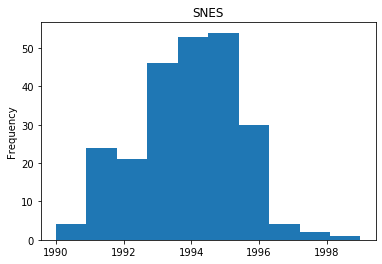

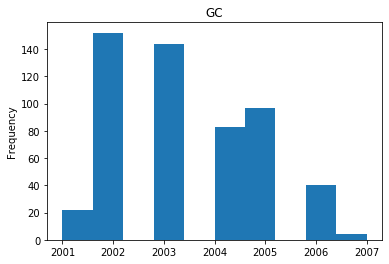

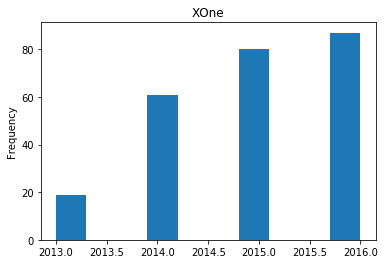

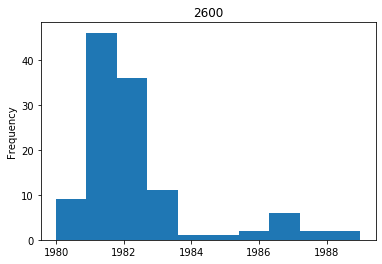

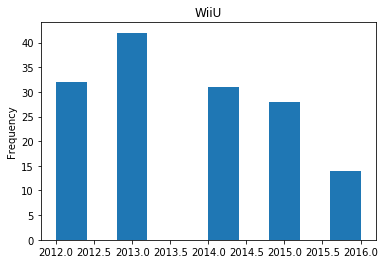

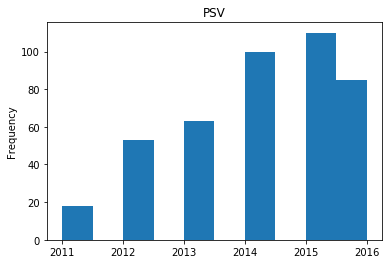

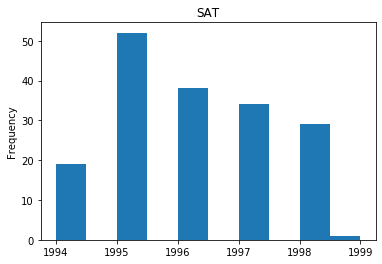

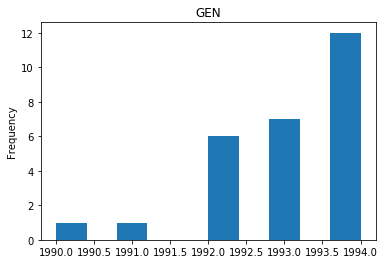

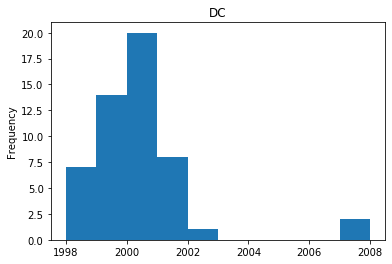

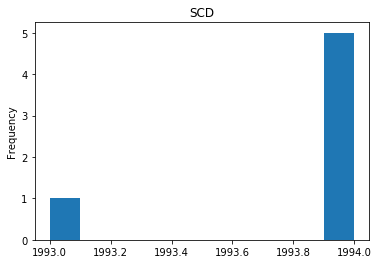

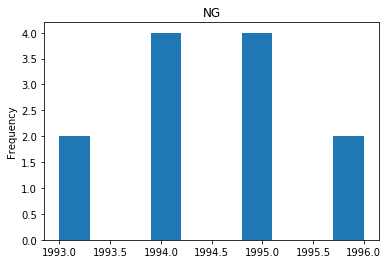

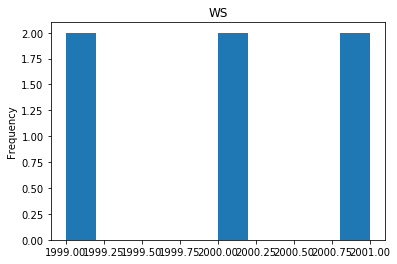

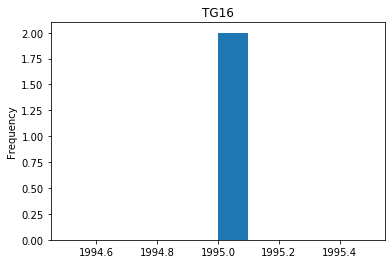

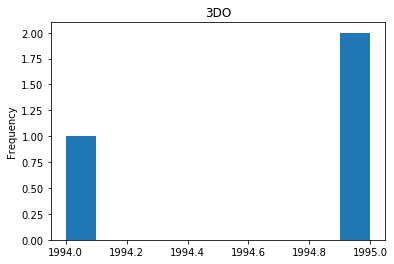

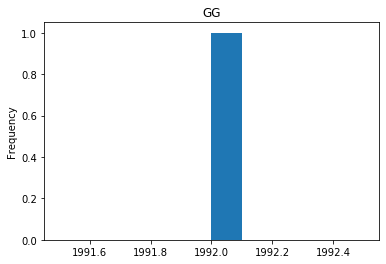

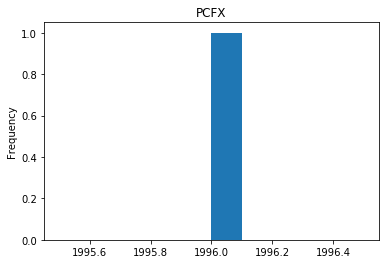

In [17]:
# Посмотрим как менялись продажи по платформам
platform_sales = df.loc[:, ['platform','year_of_release','total_sales']]
for platform in top_platforms.keys():
    platform_sales[platform_sales['platform'] == platform].plot(kind='hist', x='total_sales', title=platform, legend=False)

В прошлом популярные платформы были PS2, Wii, PS, GBA, PSP, GB, XB, NES, SNES, GC. Характерный период жизни платформы 5-6 лет, пока продажи по платформе не падают ниже среднего по всем годам. Популярные платформы существую на протяжении 9-10 лет.

Предположим, что данные с 2011 года включительно позволят исключить значимое искажения распределения по платформам в 2016 году.

In [18]:
# Отфильтруем данные, выделив записи с играми выпущеными в 2011 году и позднее
filter_df = df[df['year_of_release'] >= 2011]

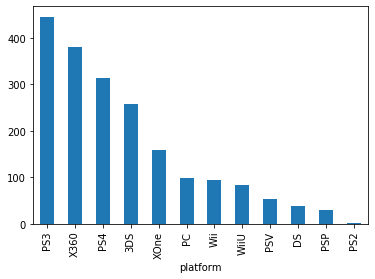

In [19]:
# Посмотрим как распределились суммарные продажи с 2011 года по платформам
sorted_platforms = filter_df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
sorted_platforms.plot(kind='bar')

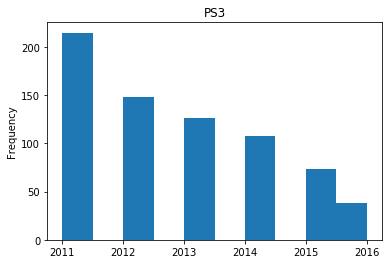

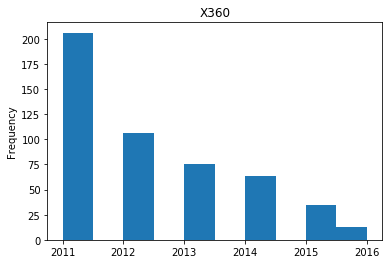

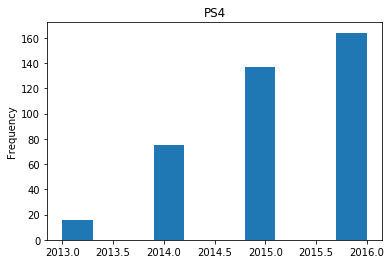

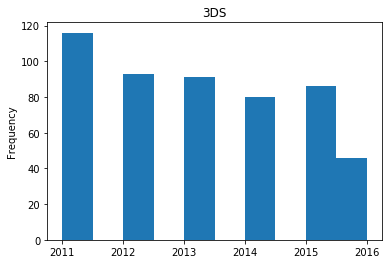

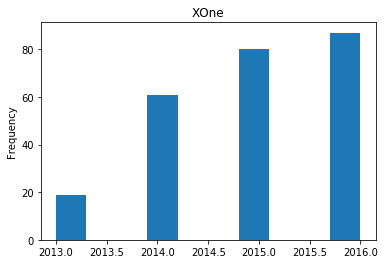

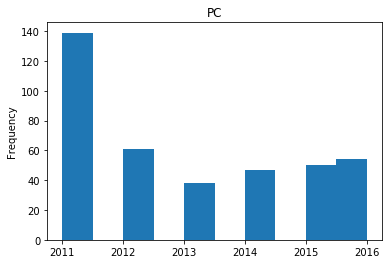

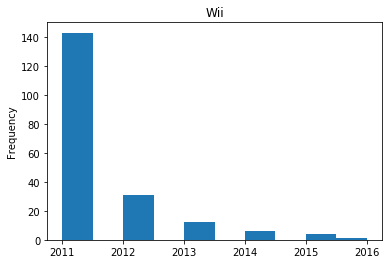

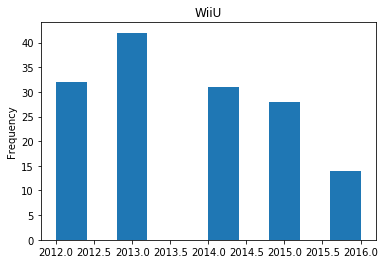

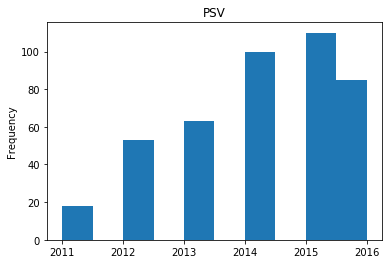

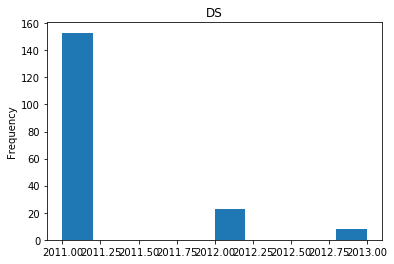

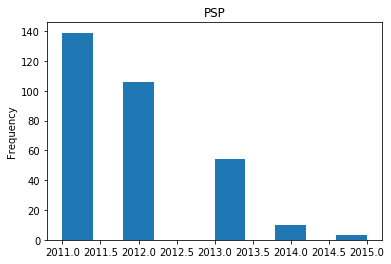

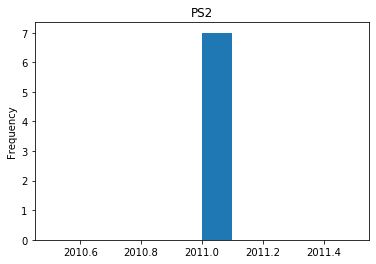

In [20]:
# Посмотрим как распределились продажи с 2011 года по платформам за каждый год
platform_sales_2011 = filter_df.loc[:, ['platform','year_of_release','total_sales']]
for platform in sorted_platforms.keys():
    platform_sales_2011[platform_sales_2011['platform'] == platform].plot(kind='hist', x='total_sales', title=platform, legend=False)

На основании графиков можно выделить следующие платформы:
* заметен рост продаж на протяжении последних лет: PS4, XOne, PSV.
* стабильные продажи на протяжении последних лет: 3DS, WiiU, PC.
* снижение продаж на протяжении последних лет: PS3, X360, Wii, PSP

Потенциально прибыльными в данном случае будут платформы PS4, XOne, PSV. Добавим к ним платформы 3DS, WiiU, PC так как они имеют стабильный уровень продаж на протяжении последних лет. 
Дополнительно можно было добавить PS3, X360 - вероятнее всего следующим поколением данных платформ являются PS4 и XOne и возможно прозводителями продумана обратная совместимость игр выпущеных для старых платформ с платформами нового поколения.

In [21]:
# Отберем потенциально прибыльные платформы
top_platforms = ['PS4', 'XOne', 'PSV', '3DS', 'WiiU', 'PC']

# Отберем данные по данным платформам
top_platforms_df = filter_df.query('platform in @top_platforms')

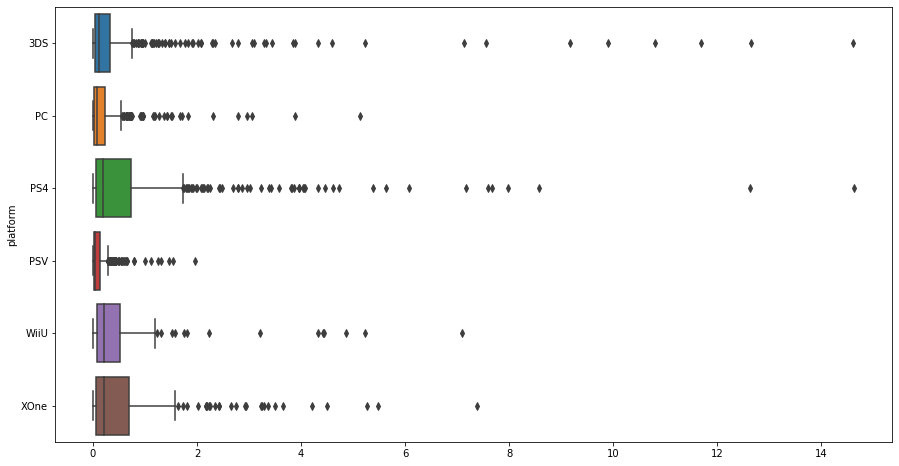

In [22]:
# Построим boxplot по глобальным продажам каждой игры и разбивкой по платформам
top_platforms_pt = top_platforms_df.pivot_table(index='name', values='total_sales', columns='platform', aggfunc='sum')
plt.figure(figsize=(15,8))
sns.boxplot(data=top_platforms_pt, orient="h")

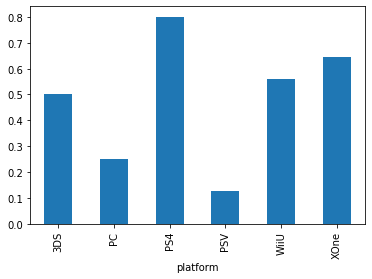

In [23]:
# Посмотрим среднее продаж на разных платформах
top_platforms_pt.mean().plot(kind='bar')

По графику boxplot видно, что медиана продаж примерно равна и составляет около 0.2 у платформ PS4, WiiU, XOne. У платформ 3DS, PS, PSV составляет около 0.1. При этом заметны выбросы. Среднее продаж платформ схоже у 3DS, WiiU, XOne, выше у PS4, ниже у PC, PSV. 

In [24]:
# Выберем популярную платформу PS4, посмотрим как влияют на продажи внутри одной платформы отзывы пользователей и критиков
platform_ps4 = top_platforms_df.query('platform == "PS4"')

-0.031957110204556424

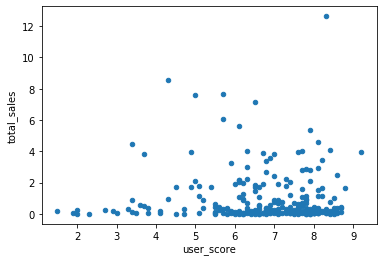

In [25]:
# Построим диаграмму рассеяния и посчитаем корреляцию между отзывами пользователей и продажами
platform_ps4.plot(y='total_sales', x='user_score', kind='scatter')
platform_ps4['total_sales'].corr(platform_ps4['user_score'])

0.406567902061781

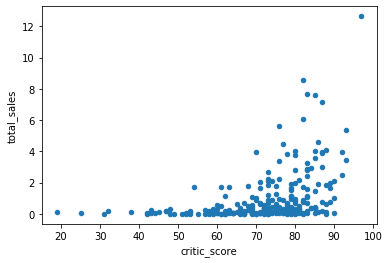

In [26]:
# Построим диаграмму рассеяния и посчитаем корреляцию между отзывами критиков и продажами
platform_ps4.plot(y='total_sales', x='critic_score', kind='scatter')
platform_ps4['total_sales'].corr(platform_ps4['critic_score'])

0.08798399271321643

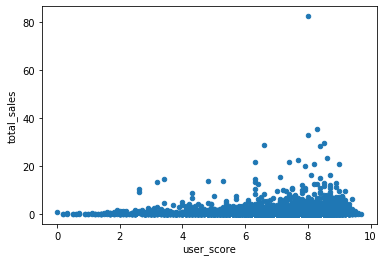

In [27]:
# Построим диаграмму рассеяния и посчитаем корреляцию между отзывами пользователей и продажами по всем платформам
df.plot(y='total_sales', x='user_score', kind='scatter')
df['total_sales'].corr(df['user_score'])

0.24534884547411376

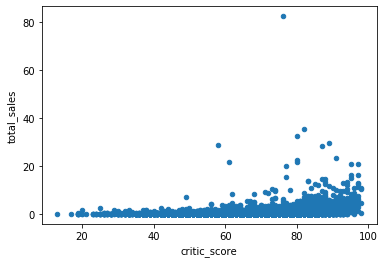

In [28]:
# Построим диаграмму рассеяния и посчитаем корреляцию между отзывами критиков и продажами по всем платформам
df.plot(y='total_sales', x='critic_score', kind='scatter')
df['total_sales'].corr(df['critic_score'])

По диаграммам рассеяния и показателям корреляции мы видим, что зависимость между оценками пользователей и продажами практически отсутствует (-0.03), но показатель корреляции между оценками критиков и продажами показывает, что отзывы критиков могут влиять на продажи (0.4). Можно предположить, что пользователи ориентируются при покупке игр (новинок игр) на отзывы (обзоры) критиков, как лидеров мнений.
В целом при построении диаграмм и вычислении корреляции между остальными платформами показатели на других платформах могут отличатся. На некоторых платформах может присутствовать влияние оценок пользователей и наоброт, оценки критиков оказыаются не столь важными.

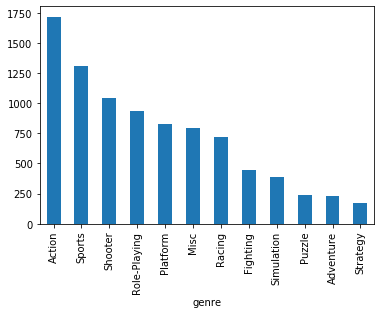

In [29]:
# Построим распределение по жанрам
genre_pt = df.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
genre_pt.plot(kind='bar')

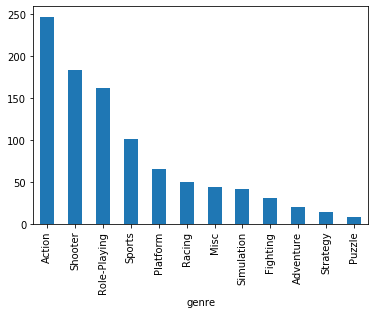

In [30]:
# Построим распределение по жанрам по перспективным платформам после 2011 года
genre_top = top_platforms_df.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
genre_top.plot(kind='bar')

Прибыльные жанры могут есть и даже могут превышать в продажах в 1.5-2 раза по сравнению с остальными. Были проанализированы продажи игр по жанрам за все время, а также с 2011 года.

Среди всех жанров с высокими продажами за все время можно выделить Action, Sports, Shooter, Role-Playing, Platform.
Среди всех жанров с низкими продажами за все время можно выделить Strategy, Adventure, Puzzle, Simulation, Fighting.

Среди всех жанров с высокими продажами c 2011 года можно выделить Action, Shooter, Role-Playing, Sports, Platform.
Среди всех жанров с низкими продажами c 2011 года можно выделить Puzzle, Strategy, Adventure, Fighting, Simulation.

Как видно 5-ка жанров с высокими и низкими продажами не особо изменилась, некоторые жанры становятся более продаваемыми за последние года, другие же наоборот становятся менее прибыльными.

В данном разделе был проведен исследовательский анализ данных.

Проведено исследование по количеству выпущеных игр за все года, которое показывало определенный рост количества выпущенных игр до 2008-2009 годов и спад. Это могло быть обусловленно не только спадом популярности видеоигр, но так же и переходным периодом когда игра могла быть выпущена на старых платформах, которые еще поддерживались производителями и разработчиками видеоигр и на новых платформах, которые были созданы относительно недавно и им предстояло набрать свою популярность.

Проведено исследование популярных платформ по количествам продаж и продолжительности существования платформ относительно этих продаж.

PS2, X360, PS3, Wii, DS, PS оказались самыми популярными по количествам продаж, однако на данный момент являются не поддерживаемыми разработчиками, а на замену им пришли платформы нового поколения. Продолжительность существования популярных платформ составила около 10 лет.

Продолжительность жизни большинства старых платформ оказалась около 5-6 лет.

Прибыльными жанрами являются Action, Shooter, Role-Playing, Sports, Platform.

Построенные диаграммы рассеяния и расчет корреляции между продажами и рейтингами пользователей и критиков показал, что существует зависимость продаж между рейтингами критиков, что можно использовать как дополнительный фактор повышения продаж.

## Составление портрета пользователя каждого региона
Определите для пользователя каждого региона (NA, EU, JP):
* Самые популярные платформы (топ-5). Опишите различия в долях продаж.
* Самые популярные жанры (топ-5). Поясните разницу.
* Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [31]:
top_platforms_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2116 entries, 31 to 16714
Data columns (total 12 columns):
name               2116 non-null object
platform           2116 non-null object
year_of_release    2116 non-null int64
genre              2116 non-null object
na_sales           2116 non-null float64
eu_sales           2116 non-null float64
jp_sales           2116 non-null float64
other_sales        2116 non-null float64
critic_score       1085 non-null float64
user_score         1159 non-null float64
rating             1205 non-null object
total_sales        2116 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 214.9+ KB


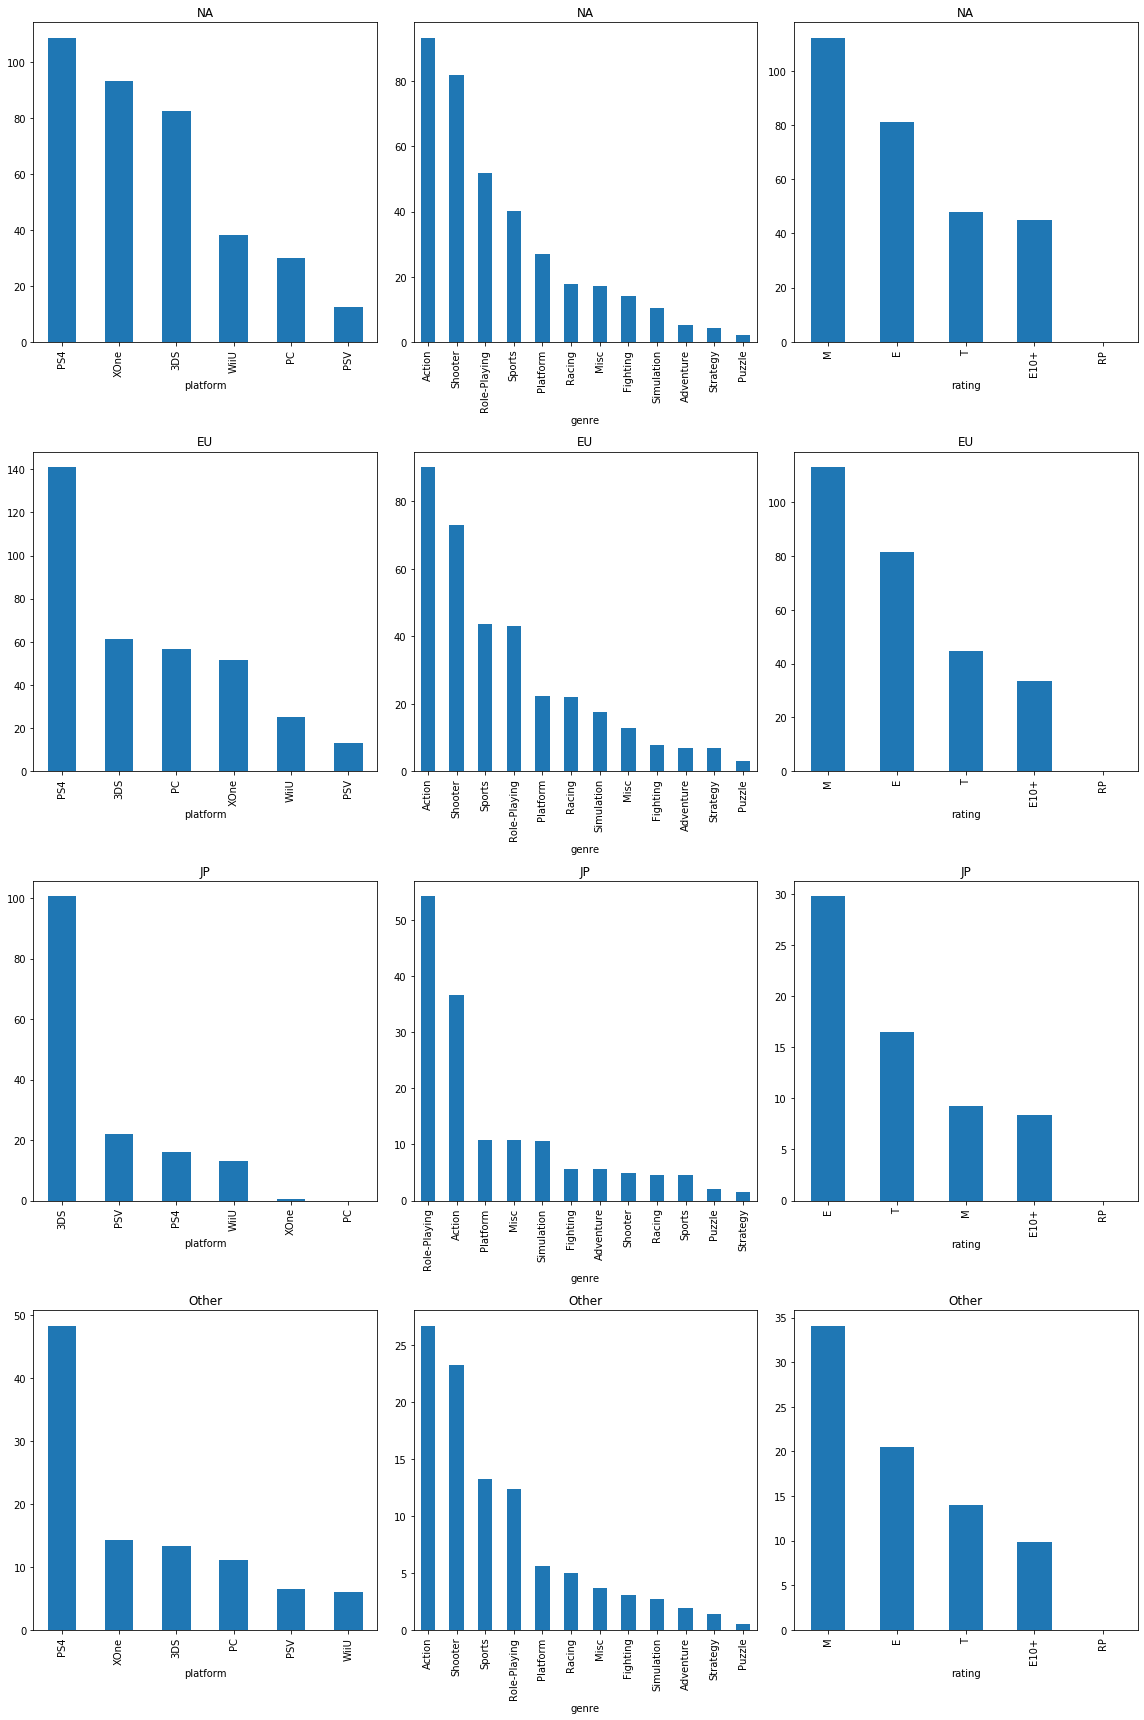

In [32]:
# Подсчитаем и выведем распределение по каждой платформе и жанру для каждого региона
na_platform = top_platforms_df.groupby('platform')['na_sales'].sum().sort_values(ascending=False)
na_genre = top_platforms_df.groupby('genre')['na_sales'].sum().sort_values(ascending=False)
na_rating = top_platforms_df.groupby('rating')['na_sales'].sum().sort_values(ascending=False)

eu_platform = top_platforms_df.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)
eu_genre = top_platforms_df.groupby('genre')['eu_sales'].sum().sort_values(ascending=False)
eu_rating = top_platforms_df.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)

jp_platform = top_platforms_df.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)
jp_genre = top_platforms_df.groupby('genre')['jp_sales'].sum().sort_values(ascending=False)
jp_rating = top_platforms_df.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)

other_platform = top_platforms_df.groupby('platform')['other_sales'].sum().sort_values(ascending=False)
other_genre = top_platforms_df.groupby('genre')['other_sales'].sum().sort_values(ascending=False)
other_rating = top_platforms_df.groupby('rating')['other_sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(16, 24))

plt.subplot(4, 3, 1)
na_platform.plot(kind='bar', title='NA')
plt.subplot(4, 3, 2)
na_genre.plot(kind='bar', title='NA')
plt.subplot(4, 3, 3)
na_rating.plot(kind='bar', title='NA')
plt.subplot(4, 3, 4)
eu_platform.plot(kind='bar', title='EU')
plt.subplot(4, 3, 5)
eu_genre.plot(kind='bar', title='EU')
plt.subplot(4, 3, 6)
eu_rating.plot(kind='bar', title='EU')
plt.subplot(4, 3, 7)
jp_platform.plot(kind='bar', title='JP')
plt.subplot(4, 3, 8)
jp_genre.plot(kind='bar', title='JP')
plt.subplot(4, 3, 9)
jp_rating.plot(kind='bar', title='JP')
plt.subplot(4, 3, 10)
other_platform.plot(kind='bar', title='Other')
plt.subplot(4, 3, 11)
other_genre.plot(kind='bar', title='Other')
plt.subplot(4, 3, 12)
other_rating.plot(kind='bar', title='Other')
plt.tight_layout()
plt.show()

На основании графиков была получена следующая информация:
В Северной Америке преобладают платформы PS4, XOne, 3DS, жанры Action, Shooter, Role-Playing, Sports, Platform, рейтинги M,E,T.
В Европе PS4, 3DS, PC, жанры Action, Shooter, Sports, Role-Playing, Platform, рейтинги M,E,T.
В Японии 3DS, PSV, PS4, жанры Role-Playing, Action, Platform, Misc, Simulation, рейтинги E,T,M.
В других регионах PS4, XOne, 3DS, жанры Action, Shooter, Sports, Role-Playing, Platform, рейтинги M,E,T.

Популярные жанры в Японии отличаются от популярных платформ в Северной Америке и Европе, также как и популярные платформы. Это может быть обусловлено выпусаемыми играми на данных платформах. Что касаемо рейтингов в Японии в отличии от остальных регионов преобладают игры с рейтингом «E» («Everyone») — «Для всех»: Содержание для возрастной категории от 6 лет и старше, игры которые могут играть как дети так и взрослые. В Северной Америке и Европе преобладают игры с рейтингом «M» («Mature») — «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет, игры с контентом для взрослой аудитории и подростков постарше.

## Проведение исследования статистических показателей
* Как изменяется пользовательский рейтинг и рейтинг критиков в различных жанрах? Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения

              count      mean       std  min    25%   50%    75%  max
genre                                                                
Action        377.0  6.827056  1.344674  2.0  6.200  7.10  7.800  9.0
Adventure      63.0  7.585714  1.123339  3.6  7.150  7.80  8.400  9.3
Fighting       39.0  6.897436  1.516486  2.9  6.000  7.50  7.800  8.7
Misc           52.0  6.957692  1.113614  4.1  6.200  7.00  7.800  8.7
Platform       62.0  6.995161  1.508601  2.9  6.000  7.35  8.275  9.0
Puzzle         14.0  7.164286  1.162628  4.8  6.425  7.40  7.900  8.6
Racing         65.0  6.516923  1.498287  1.6  5.800  6.70  7.900  9.1
Role-Playing  131.0  7.350382  1.194563  1.4  6.750  7.50  8.200  9.3
Shooter       139.0  6.497842  1.529491  2.5  5.700  6.80  7.700  8.9
Simulation     46.0  6.195652  1.725103  2.2  5.350  6.70  7.400  8.9
Sports        120.0  5.717500  1.627013  1.4  4.875  5.95  6.900  8.8
Strategy       51.0  6.435294  1.803422  2.0  5.450  7.10  7.850  8.7
genre
Action        

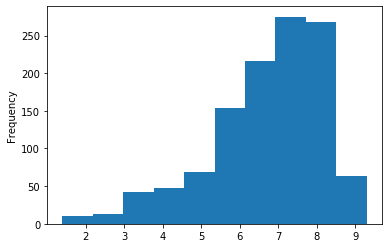

In [33]:
# Рассмотрим основные статистики по пользовательскому рейтингу
print(top_platforms_df.groupby('genre')['user_score'].describe())
# Рассчитаем дисперсию
print(top_platforms_df.groupby('genre')['user_score'].var())
# Построим распределение
top_platforms_df['user_score'].plot(kind='hist')

              count       mean        std   min   25%   50%    75%   max
genre                                                                   
Action        342.0  70.432749  12.431390  24.0  64.0  73.0  79.00  97.0
Adventure      56.0  72.321429  10.697675  43.0  65.0  72.5  81.00  88.0
Fighting       38.0  70.605263  13.022931  23.0  64.0  74.0  79.00  86.0
Misc           51.0  71.509804  10.302179  43.0  66.0  74.0  79.50  84.0
Platform       60.0  73.950000  13.363782  38.0  65.5  77.0  84.00  93.0
Puzzle         15.0  70.000000  10.562738  49.0  67.5  70.0  76.50  88.0
Racing         62.0  72.419355  10.836412  43.0  65.0  73.5  80.00  91.0
Role-Playing  127.0  74.622047  10.711905  47.0  68.0  75.0  83.00  94.0
Shooter       136.0  75.345588  10.385445  45.0  70.0  77.0  82.00  95.0
Simulation     40.0  66.875000  11.918930  33.0  63.0  70.0  75.25  88.0
Sports        111.0  70.846847  16.667987  19.0  62.5  76.0  83.50  90.0
Strategy       47.0  72.638298  12.464603  44.0  65

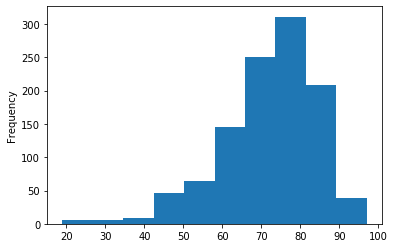

In [34]:
# Рассмотрим основные статистики по рейтингу критиков
print(top_platforms_df.groupby('genre')['critic_score'].describe())
# Рассчитаем дисперсию
print(top_platforms_df.groupby('genre')['critic_score'].var())
# Построим распределение
top_platforms_df['critic_score'].plot(kind='hist')

## Проверка гипотезы
* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные.

Задайте самостоятельно пороговое значение alpha.

Поясните:
* Как вы сформулировали нулевую и альтернативную гипотезы;
* Какой критерий применили для проверки гипотез и почему.

Нулевая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
Альтернативная гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC не одинаковые

In [35]:
# Зададим пороговый критерий alpha
alpha = 0.05
# Определим средние пользовательские рейтинги для платформ XOne и PC
XOne_user_rating = top_platforms_df.query('(platform == "XOne") & (user_score > 0)')['user_score']
PC_user_rating = top_platforms_df.query('(platform == "PC") & (user_score > 0)')['user_score']
# Используем функцию t-теста из библиотеки scipy
platform_result = st.ttest_ind(XOne_user_rating, PC_user_rating)

if platform_result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Не получилось отвергнуть нулевую гипотезу


Так как показатель pvalue оказывается больше чем alpha отклонить гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые мы не можем.

Нулевая гипотеза: Средние пользовательские рейтинги жанров Action и Sports разные
Альтернативная гипотеза: Средние пользовательские рейтинги жанров Action и Sports не разные

In [36]:
# Определим средние пользовательские рейтинги для жанров Action и Sports
Action_user_rating = top_platforms_df.query('(genre == "Action") & (user_score > 0)')['user_score']
Sports_user_rating = top_platforms_df.query('(genre == "Sports") & (user_score > 0)')['user_score']

genre_result = st.ttest_ind(Action_user_rating, Sports_user_rating)

if genre_result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Отвергаем нулевую гипотезу


Так как показатель pvalue оказывается намного меньше чем alpha стоит отклонить гипотезу о том, что средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные.

## Общий вывод

Подводя итоги проделанной работы: цель данного проекта была достигнута. Были проработаны практически все аспекты затронутые в курсах пройденного модуля комплексного анализа данных.

В частности отработаны методы первичного анализа и обработки данных. Проведен исследовательский анализ данных на предмет выявления прибыльных платформ и жанров игр. Также проведены расчеты по выявлению статистических характеристик и проверке гипотез.